In [23]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geopandas.datasets as geodatasets

In [4]:

# Define the file path
file_path = '../data/phila/labeled_inspections_with_reviews.csv'
shapefile = '../data/phila/PaCounty2023_10/PaCounty2023_10.shp'

# Open data
try:
    data = pd.read_csv(file_path)
    print("Data successfully loaded.")
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print("An error occurred:", e)

Data successfully loaded.


In [7]:
data.columns

Index(['Unnamed: 0', 'Organization Name', 'Active Indicator',
       'Public Facility Name', 'Program Group Type', 'Address', 'City',
       'County Name', 'Zip Code', 'State', 'Inspection Date',
       'Inspection Reason Type', 'Overall Compliance',
       'Georeferenced Latitude and Longitude', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'prev_date', 'prev_date_with_nulls', 'reviews', 'ratings', 'n_reviews',
       'avg_rating'],
      dtype='object')

In [47]:
data.latitude
data.longitude

0      -75.607422
1      -75.305458
2      -75.305458
3      -75.442132
4      -75.442132
          ...    
2160   -75.637134
2161   -75.605789
2162   -75.605789
2163   -75.631668
2164   -75.631668
Name: longitude, Length: 2165, dtype: float64

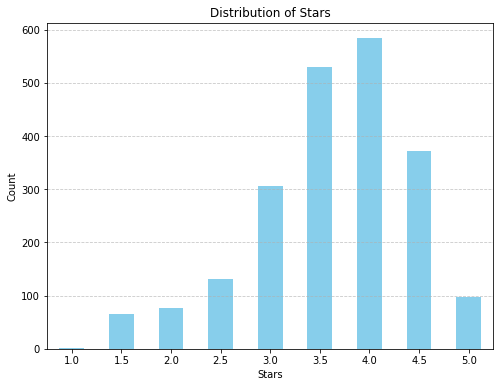

In [6]:
# Create a bar plot of the distribution of stars
plt.figure(figsize=(8, 6))
data['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

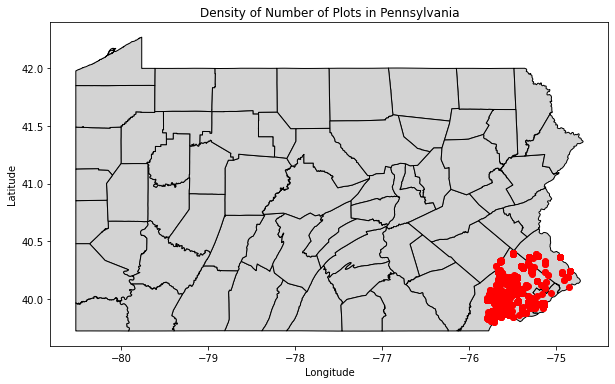

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326)  # Assuming your data points are in EPSG:4326

# Plot the Pennsylvania
pennsylvania.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot the data points
plt.scatter(data['longitude'], data['latitude'], color='red', label='Data Points')

plt.title('Density of Number of Plots in Pennsylvania')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


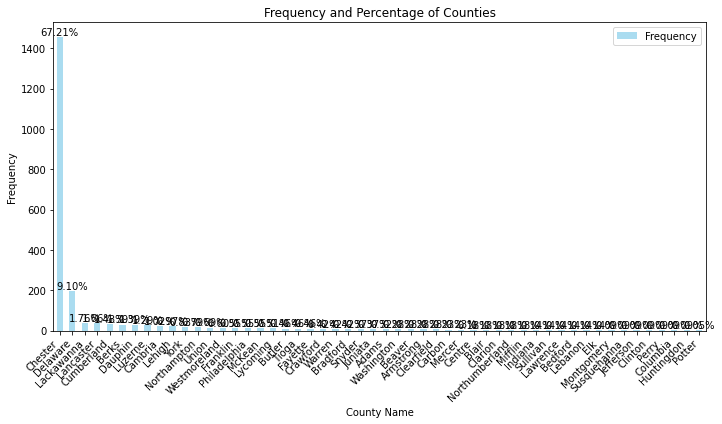

In [53]:
# Count the frequency of each county name
county_freq = data['County Name'].value_counts()

# Compute the percentage of observations for each county
total_count = len(data)
county_percentage = (county_freq / total_count) * 100

# Create a DataFrame to store both frequency and percentage
county_stats = pd.DataFrame({'Frequency': county_freq, 'Percentage': county_percentage})

# Plot the bar plot
plt.figure(figsize=(10, 6))
county_stats['Frequency'].plot(kind='bar', color='skyblue', alpha=0.7, label='Frequency')
plt.ylabel('Frequency')
plt.xlabel('County Name')
plt.title('Frequency and Percentage of Counties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add percentage text above each bar
for i, freq in enumerate(county_stats['Frequency']):
    percentage = county_stats['Percentage'][i]
    plt.text(i, freq + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.legend()
plt.show()

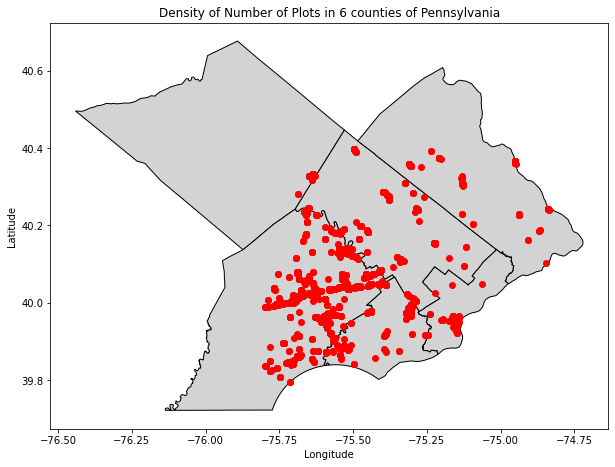

In [67]:
# Counties of interest
counties_of_interest = ['CHESTER', 'DELAWARE', 'MONTGOMERY', 'BUCKS', 'PHILADELPHIA', 'BERKS']

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326) 

# Filter the Pennsylvania shapefile to include only the counties of interest
pennsylvania_filtered = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)]

# Filter the Pennsylvania shapefile to include only the counties of interest
pennsylvania_filtered = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)]

# Plot the Pennsylvania counties of interest
pennsylvania_filtered.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot the data points
plt.scatter(data['longitude'], data['latitude'], color='red', label='Data Points')

plt.title('Density of Number of Plots in 6 counties of Pennsylvania')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

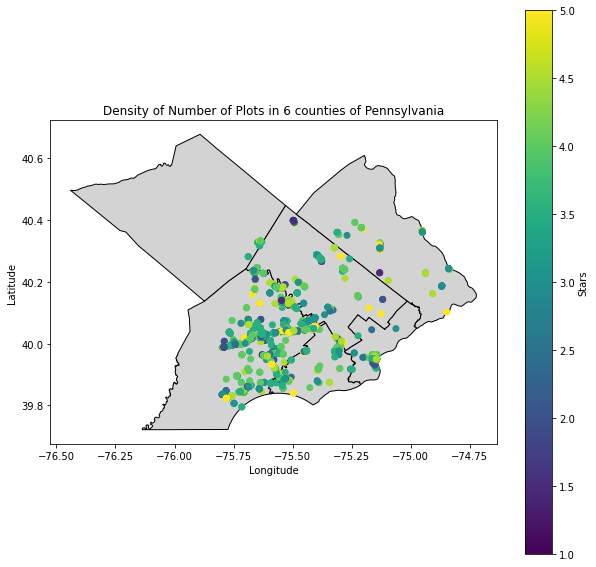

In [68]:
# Counties of interest
counties_of_interest = ['CHESTER', 'DELAWARE', 'MONTGOMERY', 'BUCKS', 'PHILADELPHIA', 'BERKS']

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326) 

# Filter the Pennsylvania shapefile to include only the counties of interest
pennsylvania_filtered = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)]

# Plot the Pennsylvania counties of interest
ax = pennsylvania_filtered.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot the data points with different colors based on the 'stars' column
scatter = ax.scatter(data['longitude'], data['latitude'], c=data['stars'], cmap='viridis', label='Data Points')

# Add a colorbar
plt.colorbar(scatter, label='Stars')

plt.title('Density of Number of Plots in 6 counties of Pennsylvania')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#Inspection reason 
# stacked bar of inspection reason and overall compliance 